In [1]:
# Section 2: Load Dataset from OpenML
# Only use when you need to import to csv in the future not now 

import openml
import pandas as pd
dataset_id = 44989

dataset = openml.datasets.get_dataset(dataset_id)
data, *_ = dataset.get_data()
data.head()

data.to_csv('king_county_dataset.csv', index=False)

print("Dataset has been saved to 'king_county_dataset.csv'")


Dataset has been saved to 'king_county_dataset.csv'


In [2]:

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split


In [3]:
# Section 2: Load the Dataset

# Replace with the actual dataset URL or file path
url = 'king_county_dataset.csv'  # Example placeholder URL
data = pd.read_csv(url)

# Display the first few rows of the dataset to understand its structure
data.head()


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date_year,date_month,date_day
0,221900.0,3,1.00,1180.0,5650.0,1.0,0,0,3,7,...,1955.0,0.0,98178,47.5112,-122.257,1340.0,5650.0,2014,10,13
1,538000.0,3,2.25,2570.0,7242.0,2.0,0,0,3,7,...,1951.0,1991.0,98125,47.7210,-122.319,1690.0,7639.0,2014,12,9
2,180000.0,2,1.00,770.0,10000.0,1.0,0,0,3,6,...,1933.0,0.0,98028,47.7379,-122.233,2720.0,8062.0,2015,2,25
3,604000.0,4,3.00,1960.0,5000.0,1.0,0,0,5,7,...,1965.0,0.0,98136,47.5208,-122.393,1360.0,5000.0,2014,12,9
4,510000.0,3,2.00,1680.0,8080.0,1.0,0,0,3,8,...,1987.0,0.0,98074,47.6168,-122.045,1800.0,7503.0,2015,2,18


In [4]:
# Section 3: Drop Unnecessary Columns

# Drop unnecessary columns (e.g., zipcode, date_year, date_month, date_day)
data = data.drop(columns=['zipcode', 'date_year', 'date_month', 'date_day'])

# Check for missing values
data.isnull().sum()


price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [5]:
# Section 4: Preprocessing the Data

# Define columns for scaling and encoding
numeric_features = ['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 
                    'bedrooms', 'bathrooms', 'floors', 'lat', 'long']
categorical_features = ['waterfront', 'view', 'condition', 'grade']

# Preprocessing pipeline
numeric_transformer = StandardScaler()  # For numeric features scaling
categorical_transformer = OneHotEncoder(drop='first')  # For categorical features encoding

# Create the ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])


In [6]:
# Section 5: Split the Data into Training and Test Sets

X = data.drop(columns=['price'])  # Features
y = data['price']  # Target variable

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply preprocessing
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)


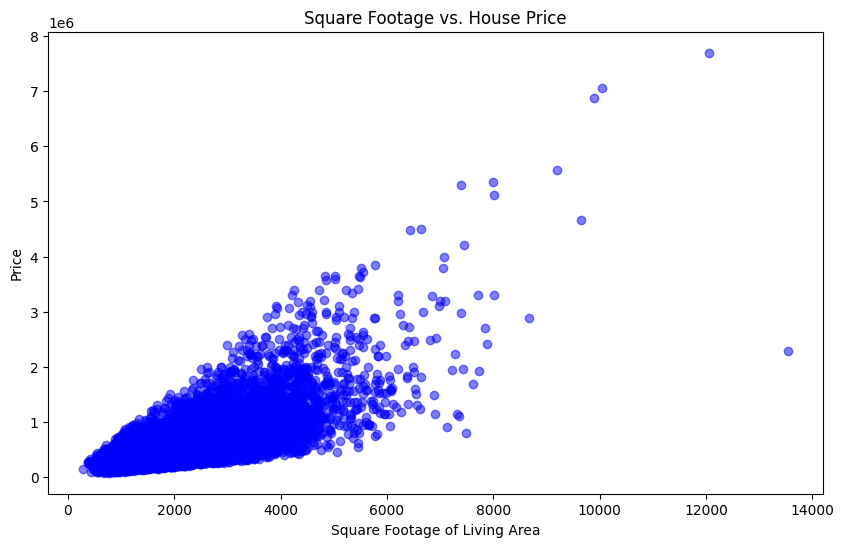

In [7]:
# Section 6: Visualize the Data

# Visualize the relationship between sqft_living and price
plt.figure(figsize=(10, 6))
plt.scatter(X['sqft_living'], y, alpha=0.5, color='b')
plt.title('Square Footage vs. House Price')
plt.xlabel('Square Footage of Living Area')
plt.ylabel('Price')
plt.show()

# You can also visualize other relationships, for example:
# plt.scatter(X['sqft_lot'], y, alpha=0.5, color='r')
# plt.title('Lot Size vs. House Price')
# plt.xlabel('Square Footage of Lot')
# plt.ylabel('Price')
# plt.show()


In [8]:
# Section 7: Conclusion

print("Preprocessing complete and visualization done.")


Preprocessing complete and visualization done.
